In [7]:
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
%matplotlib inline

In [8]:
running_in_drive = False

images_path = '../presentation/Azin_images'
models_path = '../code/Azin_models'
data_path = '../data'


if running_in_drive:
    images_path = '/content/drive/MyDrive/GA/images'
    models_path = '/content/drive/MyDrive/GA/models'
    data_path = '/content/drive/MyDrive/GA/data'

In [9]:
def read_data():
    """
    Reads the preprocessed data
    """
    
    path = f'{data_path}/processed_data.csv'
    df = pd.read_csv(path)
    df = df[['text', 'sentiment', 'Content Length', 'Content Word Count', 'emojis', 'num_comments','subreddit', 'label']]
    df.columns = df.columns.str.title()
    return df


In [10]:
df = read_data()
df.head()

,Text,Sentiment,Content Length,Content Word Count,Emojis,Num_Comments,Subreddit,Label
0,dae question scared dying scared die anxiety c...,-0.9074,0,0,NaN,9,Anxiety,1
1,health tight throat tight throat gagging feeli...,-0.0516,51,10,NaN,1,Anxiety,1
2,advice needed anxiety overriding intuition. do...,0.8996,673,128,NaN,3,Anxiety,1
3,advice needed anxiety overriding intuition. do...,0.8996,673,128,NaN,7,Anxiety,1
4,advice needed hey friends! need advice anxiety...,-0.2338,405,82,NaN,1,Anxiety,1


In [11]:
df.groupby('Subreddit')['Num_Comments'].mean()

Subreddit
Anxiety       3.489667
No Anxiety    9.577333
Name: Num_Comments, dtype: float64

In [12]:
df.groupby('Subreddit')['Sentiment'].agg(['max', 'mean', 'min'])

,max,mean,min
Subreddit,,,
Anxiety,3.1892,-0.282417,-2.5185
No Anxiety,3.0775,0.267053,-1.3624


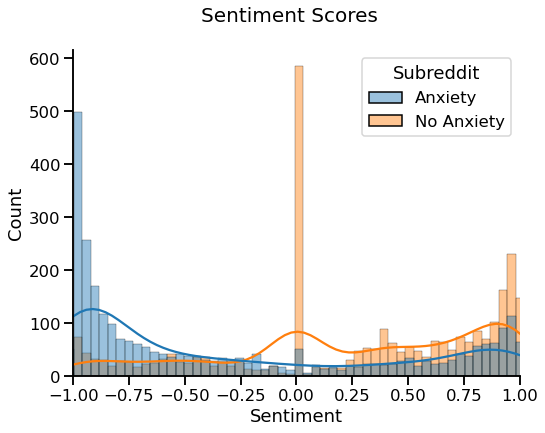

In [13]:
plt.figure(figsize=(8,6))
g = sns.histplot(df, x='Sentiment', hue='Subreddit', kde=True, legend=True, alpha=.45, bins=150);
sns.despine(top=True);
g.set_xlim(-1, 1)
plt.suptitle('Sentiment Scores', fontsize=20);
plt.savefig(f'{images_path}/sentiment_dist.png', bbox_inches='tight', dpi=300)

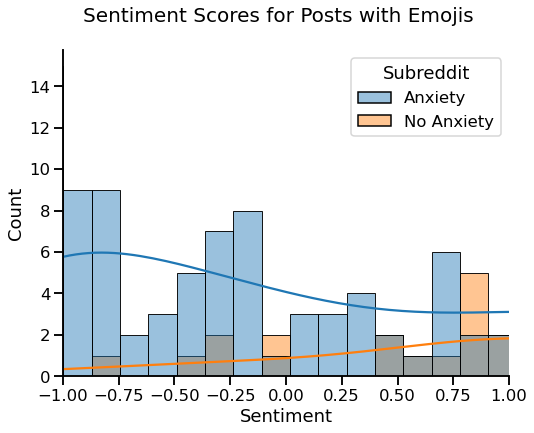

In [14]:
plt.figure(figsize=(8,6))
df_with_emojis = df[df['Emojis'].str.len()>0]
g = sns.histplot(df_with_emojis, x='Sentiment', hue='Subreddit', kde=True, legend=True, alpha=.45, bins=45);
sns.despine(top=True);
g.set_xlim(-1, 1)
plt.suptitle('Sentiment Scores for Posts with Emojis', fontsize=20);
plt.savefig(f'{images_path}/sentiment_dist_emoji.png', bbox_inches='tight', dpi=300)

In [38]:
# define a function for extracting
# the punctuations

import re
def check_find_punctuations(text):
    """
    # regular expression containing
    # all punctuation
    "https://www.geeksforgeeks.org/extract-punctuation-from-the-specified-column-of-dataframe-using-regex/"
    """
    try:
        result = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', 
                            text)

        # form a string
        string = "".join(result)

        # list of strings return
        return string
    except Exception as e:
        return ''
    
def find_punctuations_length_normalized(text):
    """
    # regular expression containing
    # all punctuation
    "https://www.geeksforgeeks.org/extract-punctuation-from-the-specified-column-of-dataframe-using-regex/"
    """
    try:
        result = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', 
                            text)

        # form a string
        string = "".join(result)

        # list of strings return
        return len(string)/len(text)
    except Exception as e:
        return 0


In [39]:
df['Normalized Punctuation Length'] = df['Text'].apply(lambda x : find_punctuations_length_normalized(x))

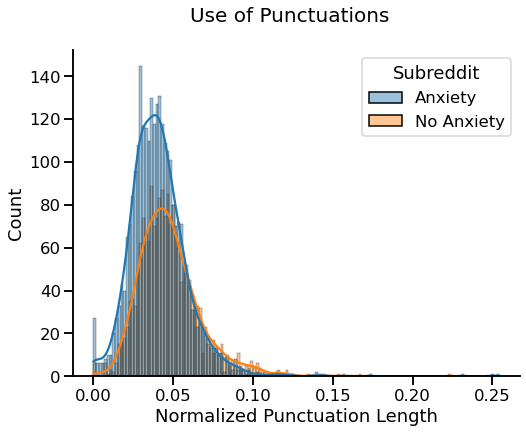

In [44]:
plt.figure(figsize=(8,6))
data = df[df['Content Length']>0]
g = sns.histplot(data, x='Normalized Punctuation Length', hue='Subreddit', kde=True, legend=True, alpha=.45, bins=150);
sns.despine(top=True);
#g.set_xlim(0, 1)
plt.suptitle('Use of Punctuations', fontsize=20);
plt.savefig(f'{images_path}/normalized_punctuation_dist.png', bbox_inches='tight', dpi=300)